# Variation of phase and power with size for 5.6GHz Bernard

Full size, no legs

In [2]:
from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [3]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

In [4]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [16]:
scale_list = ['0206', '0553', '1000', '1588']
morpho = 'body_wing'
wing_pos = 'M'
pol_list = ['H', 'V']
frequency_name = '560'

In [55]:
results_dict = {x : {y: None for y in scale_list} for x in pol_list}
ellipsoid_results_dict = {x : {y: None for y in scale_list} for x in pol_list}

In [56]:
for scale in scale_list:
    for pol in pol_list:

            path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/size_analysis_056/Bernard_parameterised_{frequency_name}_{pol}_{wing_pos}_{scale}_{morpho}_p0_s0_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/size_analysis_056/Bernard_parameterised_{frequency_name}_{pol}_{wing_pos}_{scale}_{morpho}_p0_s0_df.csv'
            df.to_csv(output_path)
            results_dict[pol][scale] = df

In [57]:
for scale in scale_list:
    for pol in pol_list:

            path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/dict/Ellipsoid_parameterised_{frequency_name}_{pol}_{scale}_p0_s0_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'parameterised/csv/Ellipsoid_parameterised_{frequency_name}_{pol}_{scale}_p0_s0__df.csv'
            df.to_csv(output_path)
            ellipsoid_results_dict[pol][scale] = df

# Functions

In [21]:
def get_horizontal_returned_phase(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    phase = np.angle(horizontal_field) * 180 / np.pi
    return phase

def get_vertical_returned_phase(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    phase = np.angle(vertical_field) * 180 / np.pi
    return phase

def get_horizontal_returned_power(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    power = np.abs(horizontal_field)**2
    return power

def get_vertical_returned_power(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    power = np.abs(vertical_field)**2
    return power

def get_linear_depol_ratio(df):
    horizontal_power = get_horizontal_returned_power(df)
    vertical_power = df['Etheta'].astype(complex).to_numpy()
    vertical_power = np.abs(vertical_power)**2
    depol_ratio = 10 * np.log10(vertical_power / horizontal_power)
    return depol_ratio

# Power with size

Text(0.5, 1.0, 'Variation of normalised scattered power H channel with Moth Scaling for H polarisation')

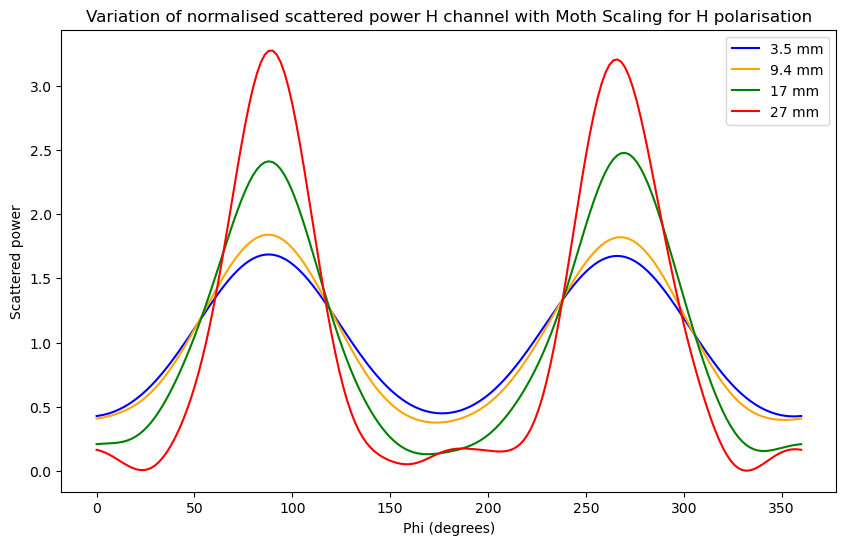

In [62]:
pol = 'H'

colours = ['blue', 'orange', 'green', 'red']
counter = 0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    df_bernard = results_dict[pol][scale]
    df_ellipsoid = ellipsoid_results_dict[pol][scale]

    power_bernard_full = get_horizontal_returned_power(df_bernard)
    power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full/power_bernard_full.mean(), label=f'{length} mm', linestyle = '-', color=colour)
    #plt.plot(df_ellipsoid['phi'], power_ellipsoid/power_ellipsoid.mean(), label=f'{length} mm', linestyle = '--', color=colour)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of normalised scattered power {pol} channel with Moth Scaling for {pol} polarisation')

Text(0.5, 1.0, 'Variation of normalised scattered power V channel with Moth Scaling for V polarisation')

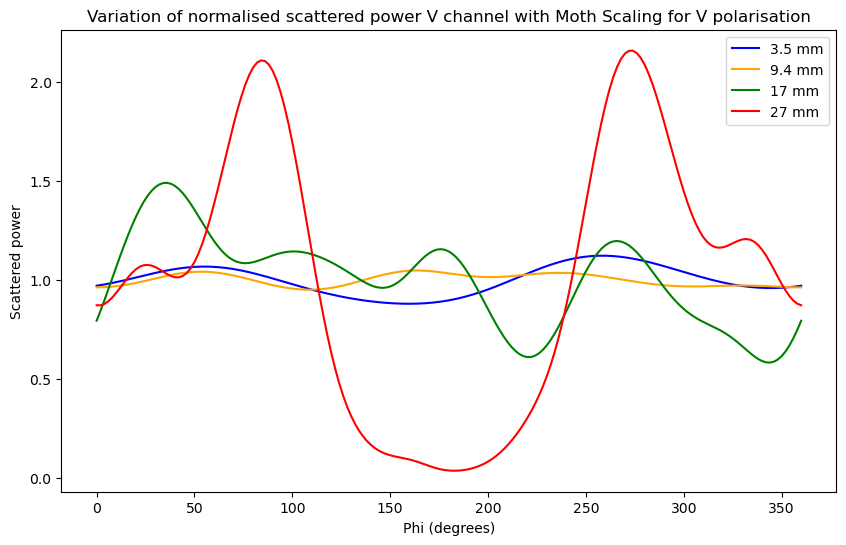

In [63]:
pol = 'V'

colours = ['blue', 'orange', 'green', 'red']
counter = 0
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    colour = colours[counter]
    counter += 1
    df_bernard = results_dict[pol][scale]
    df_ellipsoid = ellipsoid_results_dict[pol][scale]

    power_bernard_full = get_vertical_returned_power(df_bernard)
    power_ellipsoid = get_vertical_returned_power(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full/power_bernard_full.mean(), label=f'{length} mm', linestyle = '-', color=colour)
    #plt.plot(df_ellipsoid['phi'], power_ellipsoid/power_ellipsoid.mean(), label=f'{length} mm', linestyle = '--', color=colour)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of normalised scattered power {pol} channel with Moth Scaling for {pol} polarisation')

Text(0.5, 1.0, 'Variation of Zdr with scale for H-polarisation')

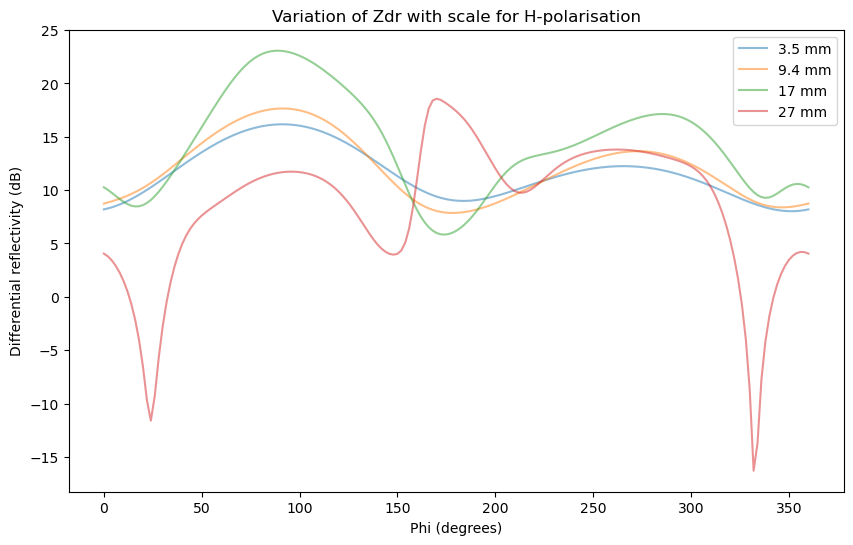

In [64]:
pol = 'H'


for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    dp = DualPol(results_dict['H'][scale], results_dict['V'][scale], read_from_df=True)
    dp._calculate_differential_reflectivity()

    plt.plot(df_bernard['phi'], dp.differential_reflectivity, label=f'{length} mm', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential reflectivity (dB)')
plt.title(f'Variation of Zdr with scale for {pol}-polarisation')

Text(0.5, 1.0, 'Variation of LDR with Moth Scaling')

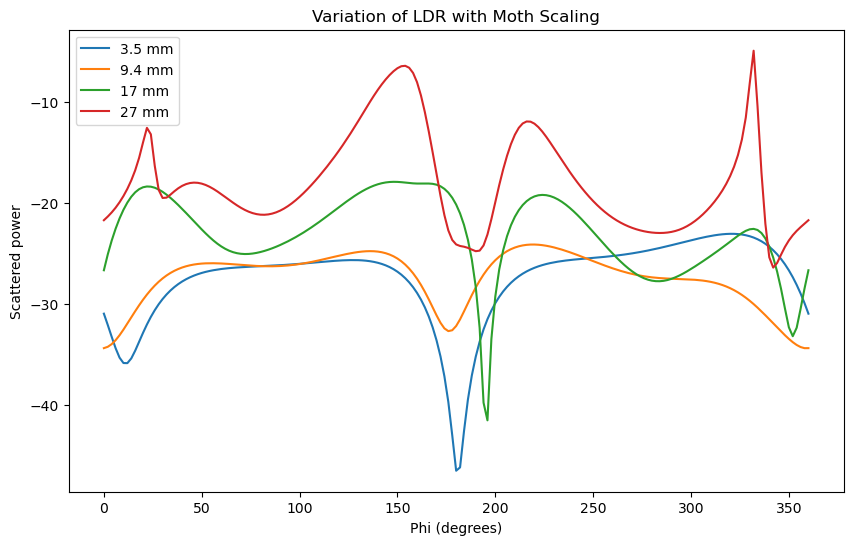

In [ ]:
pol = 'H'

for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    df_bernard = results_dict[pol][scale]
    ldr = get_linear_depol_ratio(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldr, label=f'{length} mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('LDR (dB)')
plt.title(f'Variation of LDR with Moth Scaling')

# Phase with size

Text(0.5, 1.0, 'Far field WIPL-D phase in vertical channel from incident H radiation for Moth at 5.6 GHz')

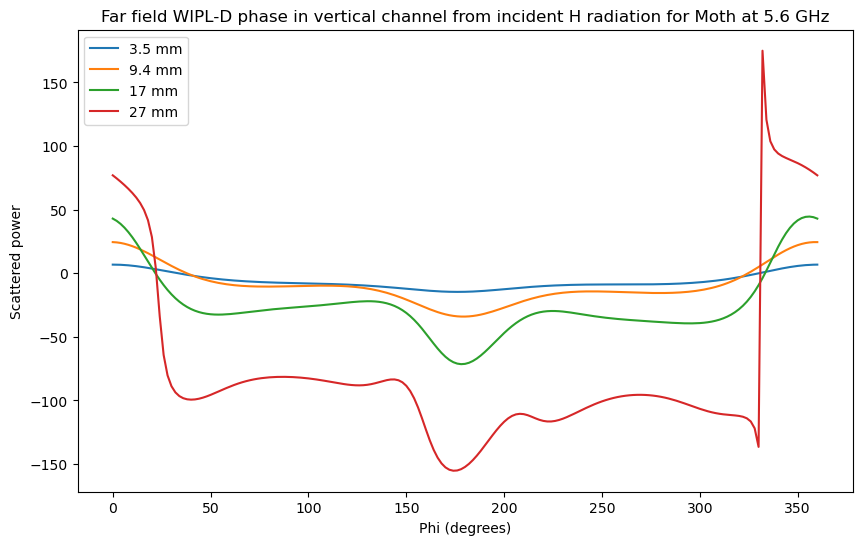

In [45]:
pol = 'H'

for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    df_bernard = results_dict[pol][scale]
    phase = get_horizontal_returned_phase(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase, label=f'{length} mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Far field WIPL-D phase in vertical channel from incident {pol} radiation for Moth at 5.6 GHz')

Text(0.5, 1.0, 'Far field WIPL-D phase in vertical channel from incident V radiation for Moth at 5.6 GHz')

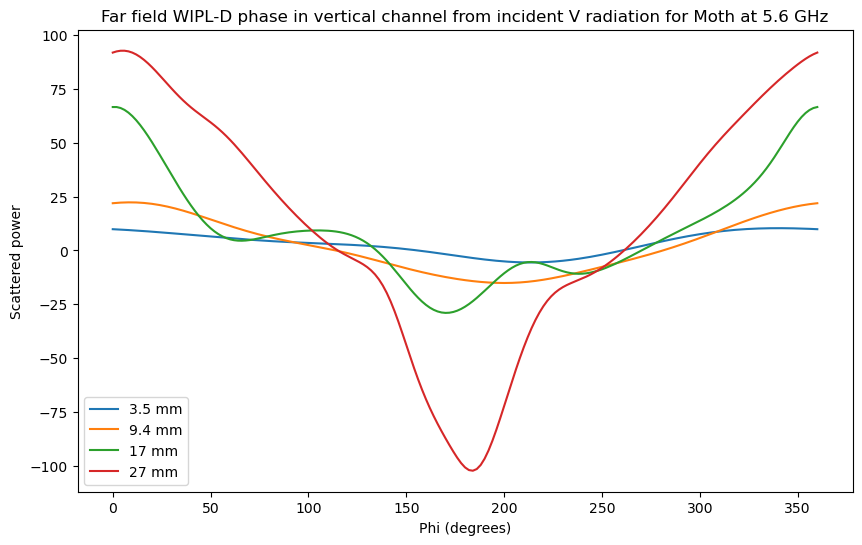

In [42]:
pol = 'V'

for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    df_bernard = results_dict[pol][scale]
    phase = get_vertical_returned_phase(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase, label=f'{length} mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Far field WIPL-D phase in vertical channel from incident {pol} radiation for Moth at 5.6 GHz')

Text(0.5, 1.0, 'Variation of PhiDP with size')

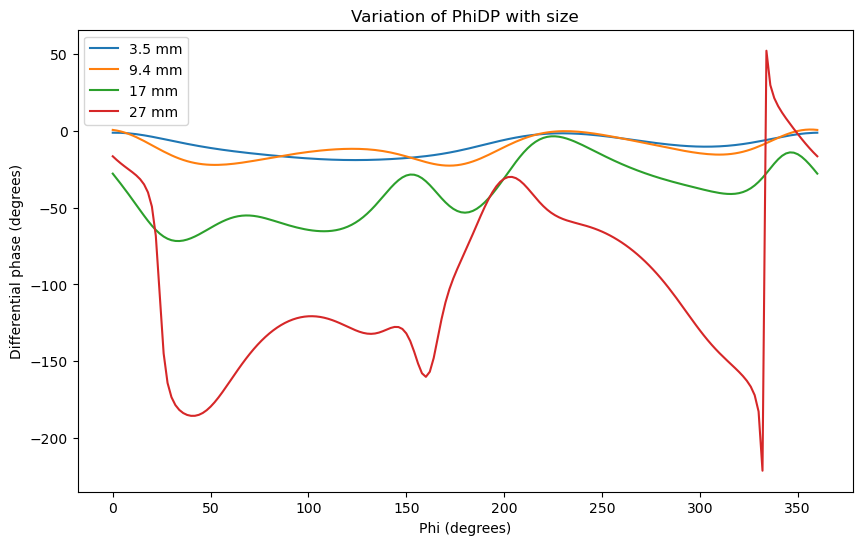

In [50]:
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    dp = DualPol(results_dict['H'][scale], results_dict['V'][scale], read_from_df=True)
    dp._calculate_differential_phase()

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], dp.differential_phase, label=f'{length} mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of PhiDP with size')